In [1]:
import sys
sys.path.append('../')
import mobipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('../models/nivafjord_simplyq_model.txt', 
                                                              '../models/data/nivafjord_drammen.dat')

Overriding property "Cloud cover" with an input series.
Overriding property "Air pressure" with an input series.
Invalidating "Reach flow flux" due to it not having any possible targets.
Invalidating "carried_flux(River thermal energy, Reach flow flux)" due to it not having any possible targets.
Invalidating "carried_flux(Salt, Reach flow flux)" due to it not having any possible targets.
Invalidating "carried_flux(Tracer, Reach flow flux)" due to it not having any possible targets.



In [3]:
app.start_date[()] = '2018-01-01'
app.end_date[()] = '2019-12-01'
app.run()

True

In [10]:

# Extract slices of the temperature and salinity results.

temp, dates = app.layer.water.temp["Drammensfjorden", :18]
sal,  dates = app.layer.water.salinity["Drammensfjorden", :18]

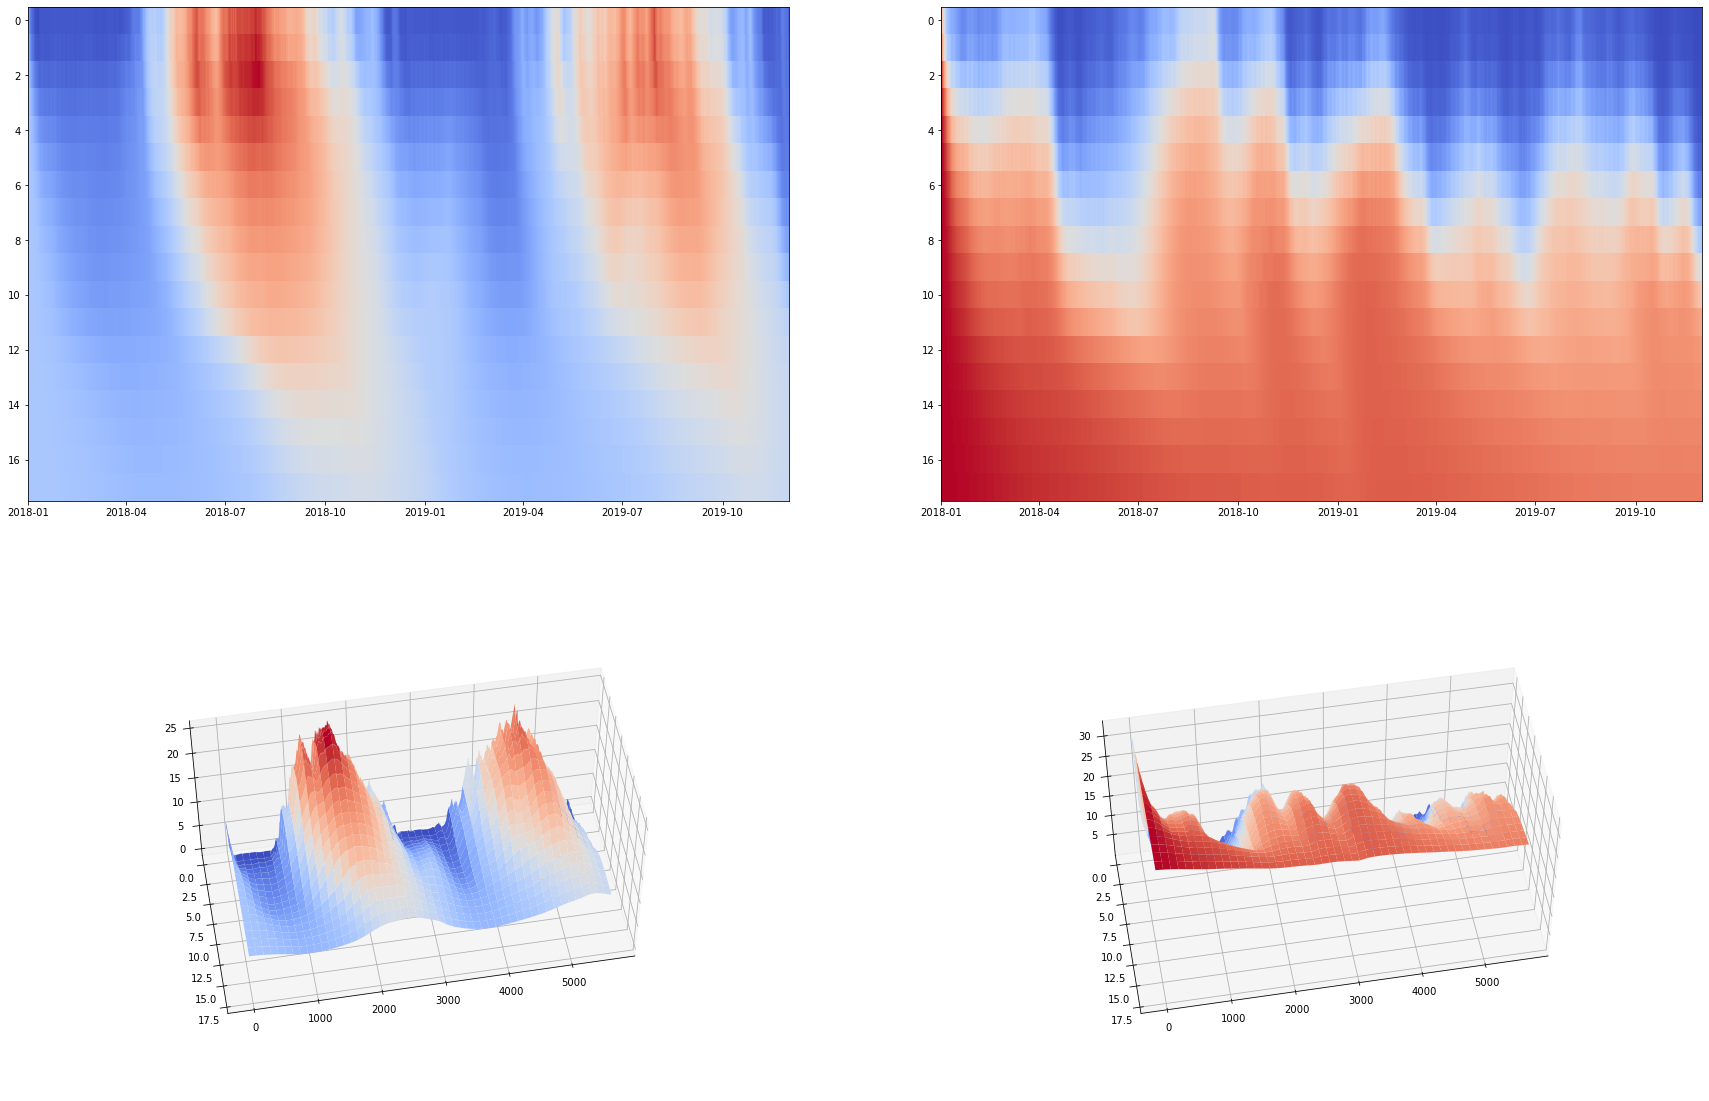

In [11]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(30, 20))
ax2.remove()
ax2 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.remove()
ax3 = fig.add_subplot(2, 2, 4, projection='3d')

ys = range(temp.shape[1])   #TODO: Should instead allow slice extraction of 'depth' parameter or something like that.
x, y = np.meshgrid(dates, ys)

ax0.pcolormesh(x, y, temp.transpose(), cmap='coolwarm', shading='auto')
ax0.invert_yaxis()
ax1.pcolormesh(x, y, sal.transpose(), cmap='coolwarm', shading='auto')
ax1.invert_yaxis()

x, y = np.meshgrid(range(len(dates)), ys)  #TODO: Figure out how to put date axis on plot_surface

ax2.plot_surface(x, y, temp.transpose(), cmap='coolwarm')
ax3.plot_surface(x, y, sal.transpose(), cmap='coolwarm')

for ax in (ax2, ax3) :
    ax.invert_xaxis()
    ax.view_init(50, 80)
    ax.set_box_aspect(aspect = (2,1,1))

<AxesSubplot:xlabel='Date'>

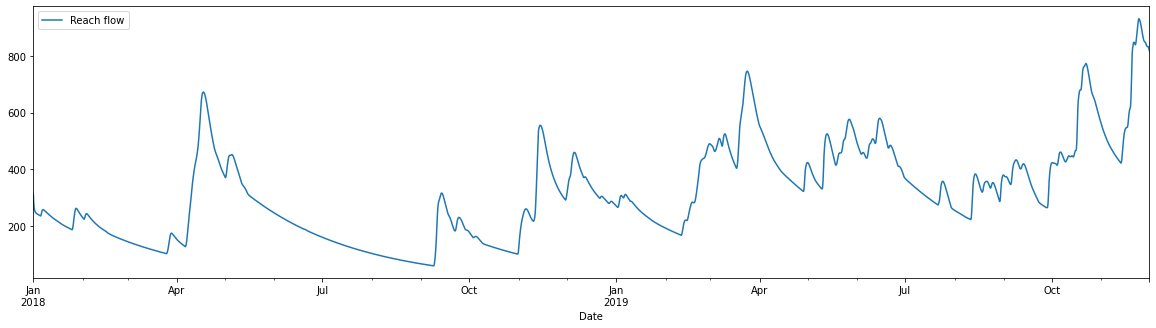

In [29]:
app.river.water.flow["Drammenselva"].plot(figsize=(20, 5), legend=True)